# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv("data/WHR2018Chapter2OnlineData.csv")

df.head()
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I am working with the World Health Report dataset, and I will be predicting the Log GPD per capita based being greater than 9.0 on other features for each country. I will be grouping the results by country so that it is more accurate. This is a supervised learning problem that will be using classification since we will predict the outcome based on other features for each country. This will be a multi-class classification since we are predicting a specific value for each. The features for my prediction will be 'Life Ladder', 'confidence in national government', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',  'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year' as I believe that all of these may affect the confidence in national government. 

This result may be important especially when it comes to the election season and picking the best candidate. If a campaign knows how much the log GDP is and what each candidate needs to focus on, they may tailor their approach and choose more important strategies that could increase it. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# making country the index of the dataframe
df.set_index('country', inplace=True)

In [4]:
df.isnull().sum()

year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)        

In [5]:
# removing the null values
df = df.dropna()

In [6]:
df = df.groupby(['country']).mean().reset_index()

In [7]:
# inspecting the dataframe after changes
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Albania,2012.0,5.510124,9.246649,0.784502,68.028885,0.601512,-0.174559,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.290000,0.303250,0.568153
1,Argentina,2011.5,6.560461,9.842538,0.910681,66.764910,0.735419,-0.145500,0.831287,0.851015,0.240678,0.415697,0.159102,-0.552361,2.063922,0.314797,0.434833,0.476067,0.345445
2,Armenia,2012.0,4.314884,8.903348,0.700926,64.242724,0.489808,-0.194352,0.894473,0.540319,0.436084,0.285284,-0.337158,-0.207510,2.140216,0.496135,0.311286,0.325067,0.406035
3,Australia,2010.0,7.450047,10.630672,0.954520,71.852341,0.932059,0.302014,0.366127,0.834236,0.220073,0.609753,1.154313,1.815898,1.737802,0.233261,0.347000,0.342750,0.412946
4,Austria,2012.0,7.324537,10.697024,0.930444,71.022234,0.912360,0.124661,0.653064,0.798689,0.158092,0.418947,1.345093,1.611550,1.804510,0.246559,0.307200,0.303818,0.348360


In [8]:
# renaming columns
new_names_dict = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Democratic Quality': 'DemQual',
            'Delivery Quality': 'DelQual',
            'GINI index (World Bank estimate)': 'GINIIndex',
            'gini of household income reported in Gallup, by wp5-year': 'HouseholdGINI'}

# YOUR CODE HERE
df = df.rename(columns = new_names_dict)
df['GDP>9'] = df['LogGDP'] > 9

In [9]:
df.head()

,country,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Confidence in national government,DemQual,DelQual,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINIIndex,"GINI index (World Bank estimate), average 2000-15",HouseholdGINI,GDP>9
0,Albania,2012.0,5.510124,9.246649,0.784502,68.028885,0.601512,-0.174559,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.290000,0.303250,0.568153,True
1,Argentina,2011.5,6.560461,9.842538,0.910681,66.764910,0.735419,-0.145500,0.831287,0.851015,0.240678,0.415697,0.159102,-0.552361,2.063922,0.314797,0.434833,0.476067,0.345445,True
2,Armenia,2012.0,4.314884,8.903348,0.700926,64.242724,0.489808,-0.194352,0.894473,0.540319,0.436084,0.285284,-0.337158,-0.207510,2.140216,0.496135,0.311286,0.325067,0.406035,False
3,Australia,2010.0,7.450047,10.630672,0.954520,71.852341,0.932059,0.302014,0.366127,0.834236,0.220073,0.609753,1.154313,1.815898,1.737802,0.233261,0.347000,0.342750,0.412946,True
4,Austria,2012.0,7.324537,10.697024,0.930444,71.022234,0.912360,0.124661,0.653064,0.798689,0.158092,0.418947,1.345093,1.611550,1.804510,0.246559,0.307200,0.303818,0.348360,True


In [10]:
y = df['GDP>9'].astype(int)

X = df.drop(columns=['LogGDP', 'country'])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Based on the data that I have, I'm going to use KNNs to determine what the LogGdp is estimated to be in each country. I chose to keep all the features since I think they will be integral to finding the right neighbors in this case
I renamed some columns in my data for better access, I also indexed it based on country so that it had more accurate and bette

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [35]:
# YOUR CODE HERE
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
num_examples = len(X_train)
param_grid = {'n_neighbors': list(np.linspace(2, np.sqrt(num_examples), num=10).astype(int))}

In [56]:
# intiialize and fit a KNN classifier model
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4
                   )
grid_search = grid.fit(X_train, y_train)
print("Done")

Done


In [57]:
best_k = grid_search.best_params_['n_neighbors']
best_k

5

In [58]:
model_best = KNeighborsClassifier(n_neighbors = best_k)
model_best.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
probabilities = model_best.predict_proba(X_test)
probability_predictions = list(probabilities[:, 1])

In [60]:
class_label_predictions = list(model_best.predict(X_test))

In [61]:
# evaluate the accuracy
accuracy = accuracy_score(y_test, class_label_predictions)
print(accuracy)

0.8571428571428571


In [62]:
cm = confusion_matrix(y_test, class_label_predictions)

In [63]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

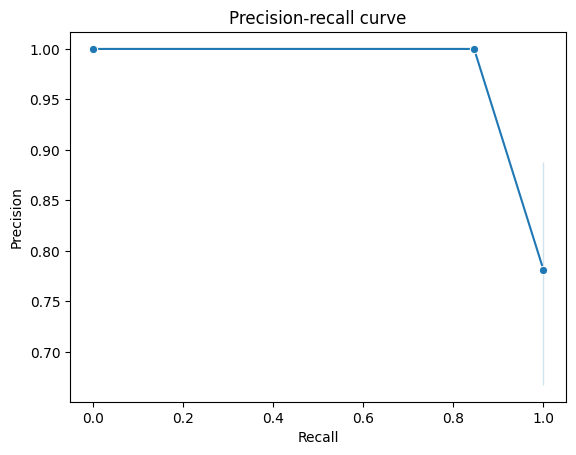

In [64]:
# observing the accuracy
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()